# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/FoodHubProject/foodhub_order.csv')

In [6]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
data.shape


(1898, 9)

#### Observations:

> There are 1898 rows and 9 columns are present.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 numerical columns (order_id, customer_id, food_preparation_time, delivery_time, cost_of_the_order ). and 4 object type columns : restaurant_name, cuisine_type, day_of_the_week, rating

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [14]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
# Write your code
data.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
#### minimum time for food preparation : 20 min
#### maximum time for food preparation : 35 min
#### average time for food preparation : 27.37 min


### **Question 5:** How many orders are not rated? [1 mark]

In [27]:
# Write the code here
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations: 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

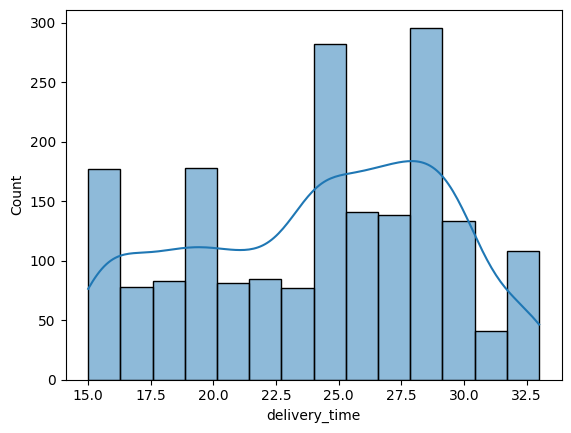

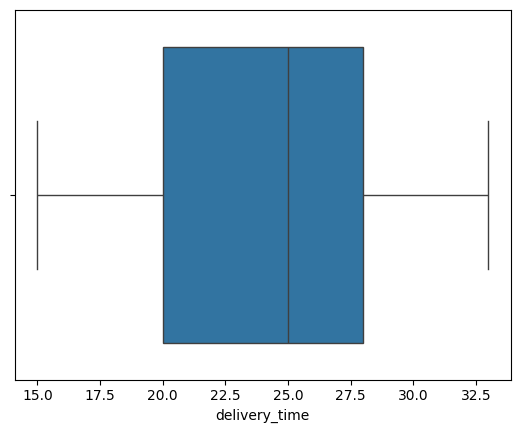

In [18]:
# Write the code here
sns.histplot (data=data, x='delivery_time', kde=True);
plt.show()
sns.boxplot (data=data, x='delivery_time');
plt.show()

**Observation** : delivery time varies from 15 min to 32.5 min ..Median time it takes is 25 min. distribution looks left screwed. Most of the deliveries takes 24 to 28 mins.

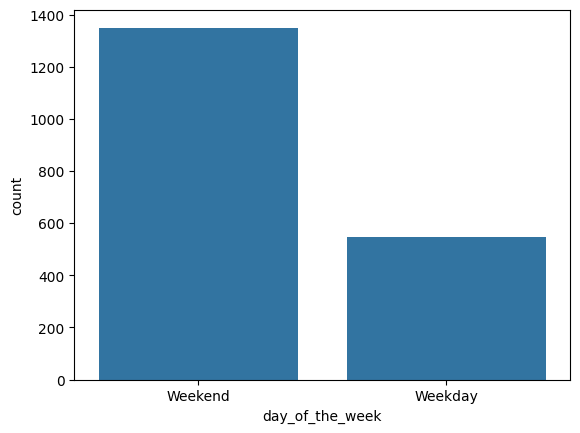

In [21]:
sns.countplot (data=data, x='day_of_the_week');
plt.show()


**Observation : ** Majority of the orders are at weekend.

<Axes: xlabel='rating', ylabel='count'>

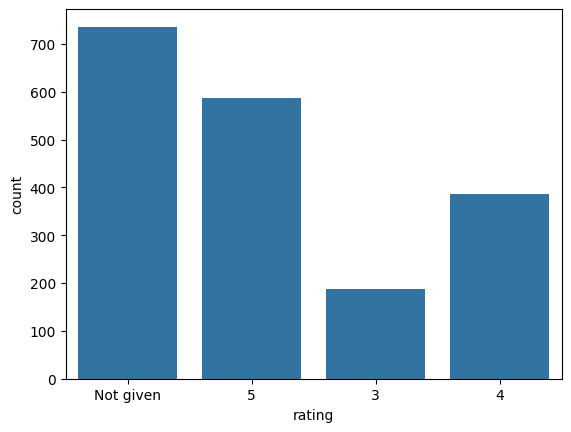

In [22]:
sns.countplot(data=data, x='rating')

**Observations** : Majority ppl have not given rating. Others have rated between 3 to 5.

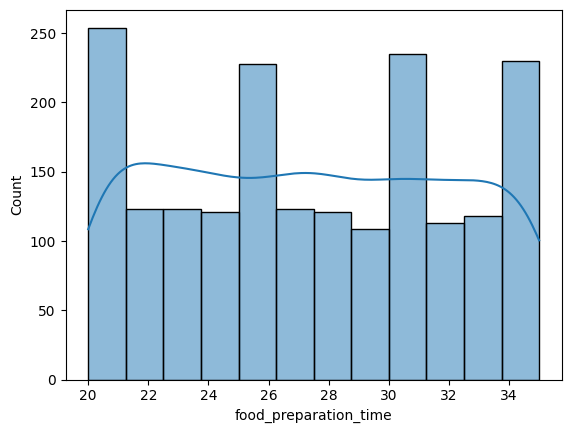

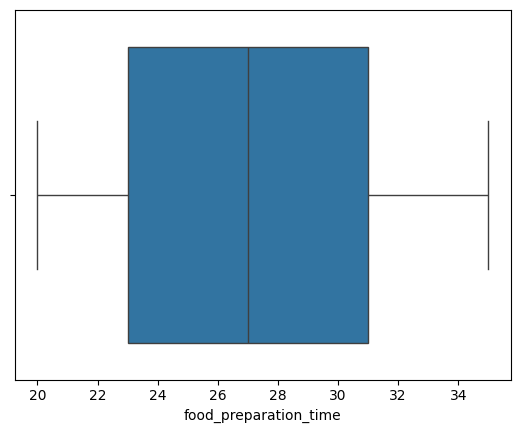

In [23]:
sns.histplot (data=data, x='food_preparation_time', kde=True);
plt.show()
sns.boxplot (data=data, x='food_preparation_time');
plt.show()


**Observation** :
Food preparation time varies from 20 min. to 36 min. Median time it takes is 27 mins.



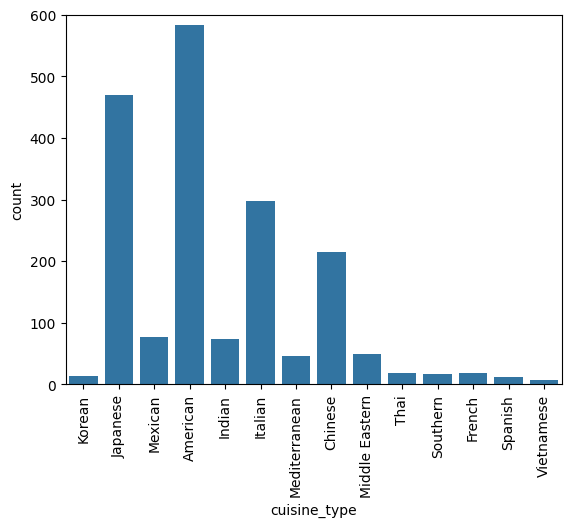

In [33]:
sns.countplot (data=data, x='cuisine_type');
plt.ylim(0,600)
plt.xticks(rotation=90)

plt.show()


**Observations** : Mostly ordered cuisine type is American. And the lease ordered is Vietnamese. Then Japanese, Italian and Chinese.

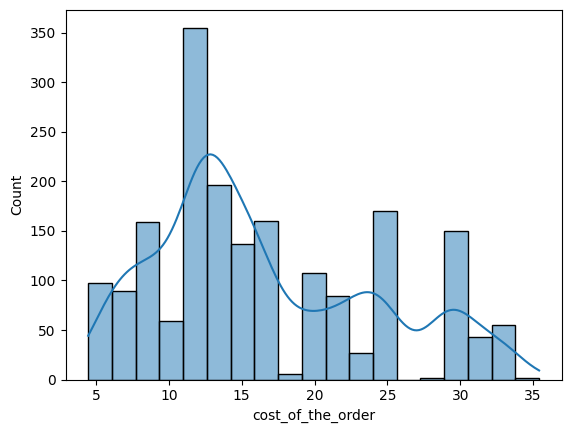

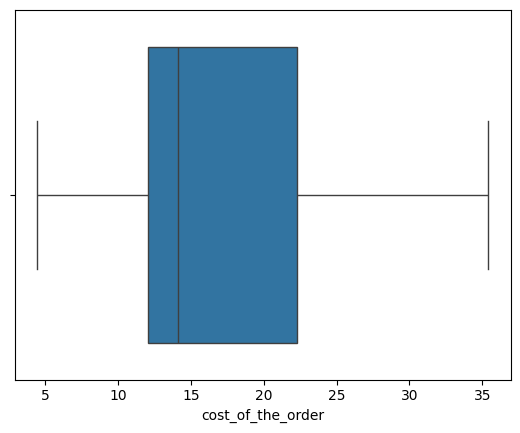

In [37]:
sns.histplot(data=data, x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

**Observation** : cost_of_the_order looks right skewed. Majority orders have cost from 10-15 dollars. Order varies from 5 dollars to 35 dollars . Median cost is around 14 dollars.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [43]:
# Write the code here
data['restaurant_name'].value_counts().head(5)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations: The top 5 restaurants that based on the number of orders received are :
Shake Shack,
The Meatball shop,
Blue Ribbon Sushi,
Blue Ribbon Fried Chicked,
Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [50]:
# Write the code here
df1=data[data['day_of_the_week']=='Weekend']
df1.groupby('cuisine_type').count()

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Chinese,163,163,163,163,163,163,163,163
French,13,13,13,13,13,13,13,13
Indian,49,49,49,49,49,49,49,49
Italian,207,207,207,207,207,207,207,207
Japanese,335,335,335,335,335,335,335,335
Korean,11,11,11,11,11,11,11,11
Mediterranean,32,32,32,32,32,32,32,32
Mexican,53,53,53,53,53,53,53,53


#### Observations:
Most popular cuisine on weekends is American cuisine.It has got 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [66]:
# Write the code here
total_count = data['cost_of_the_order'].count()
above_20_data = data[data['cost_of_the_order'] > 20]
more_than_20D_count = above_20_data['cost_of_the_order'].count()
total_percentage = more_than_20D_count * 100/ total_count
total_percentage


29.24130663856691

#### Observations:
The percentage of orders cost more than 20 dollars is : 29.24

### **Question 10**: What is the mean order delivery time? [1 mark]

In [68]:
# Write the code here
data['delivery_time'].mean().T

24.161749209694417

#### Observations:
The mean order delivery time is : 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [79]:
# Write the code here
#df = data['customer_id'].groupby('customer_id').count().nlargest(5)
df = data.groupby(['customer_id']).size().nlargest(5).reset_index(name='top5')
df.head()


,customer_id,top5
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations: The top 3 customers are with customer_id : 52832, 47440, 83287 . And the no. of orders they placed are 13, 10, 9 respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [7]:
# Write the code here
data['day_of_the_week_new'] = np.where(data['day_of_the_week']== 'Weekend', 1, 0)
# convert rating column to numeric from string. first converted 'Not given' to 0 and then convert string to numeric column
data['rating'] = np.where(data['rating'] == 'Not given', '0', data['rating'] )
data['rating'] = data['rating'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   day_of_the_week_new    1898 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 148.4+ KB


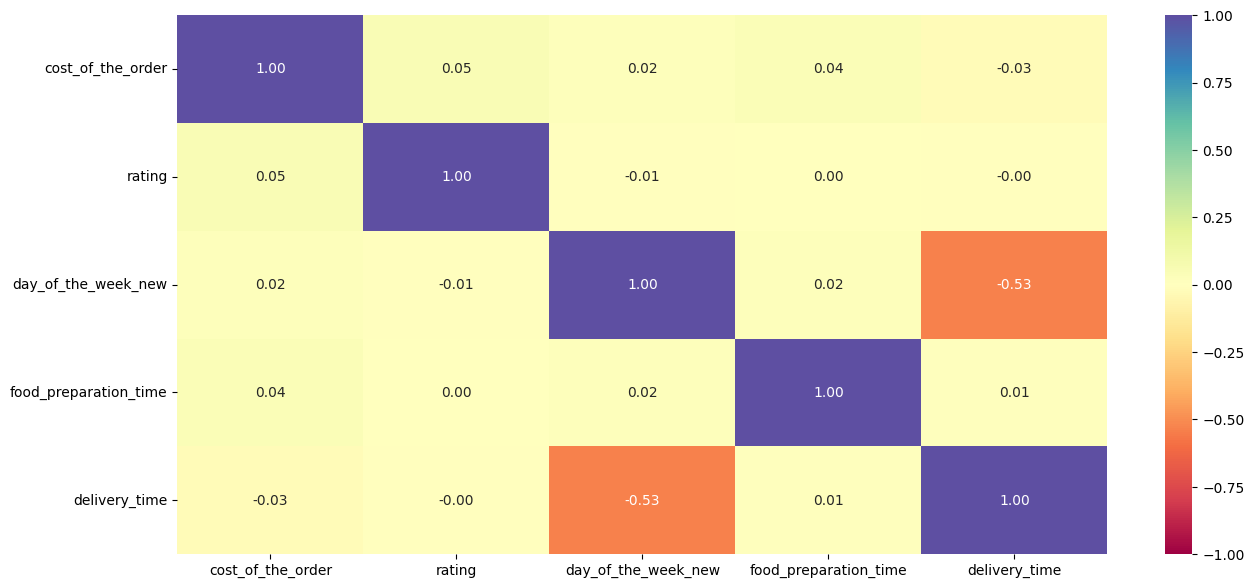

In [27]:
num_var = ['cost_of_the_order','rating_new','day_of_the_week_new','food_preparation_time','delivery_time']

corr = data[['cost_of_the_order','rating','day_of_the_week_new','food_preparation_time','delivery_time']].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


Observation : It seems the day_of_the_week column is very little negatively co-related withe delivery_time. Otherwise columns are not really co-related with each other.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

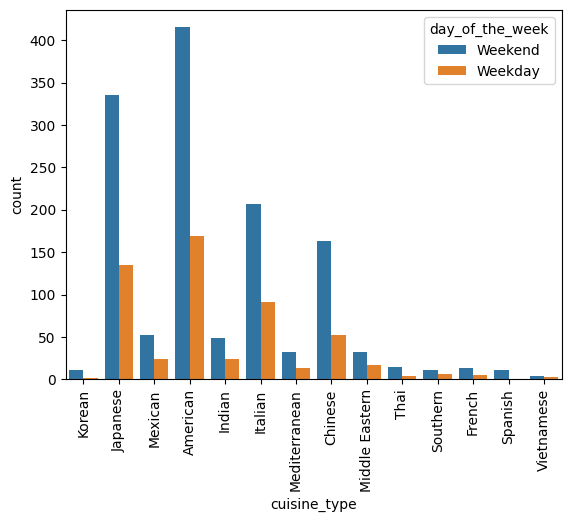

In [30]:
sns.countplot (data=data, x = 'cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90)

**Observation** : the food orders are more on weekends compared to weekdays

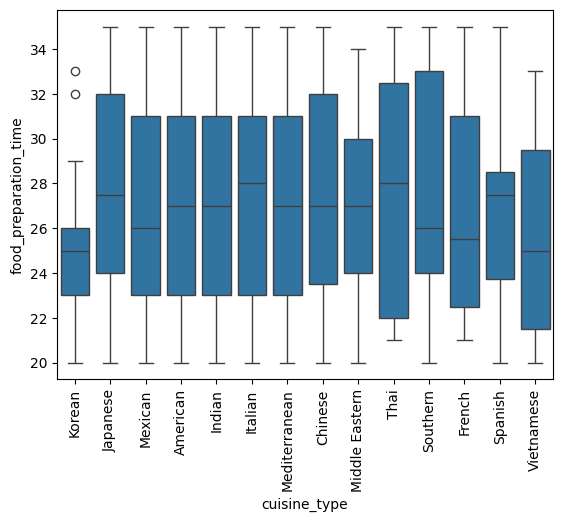

In [35]:
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show ()

Observation : Korean dishes takes less time compared to other dishes for food preparation. Other dishesh more or less almost takes same time

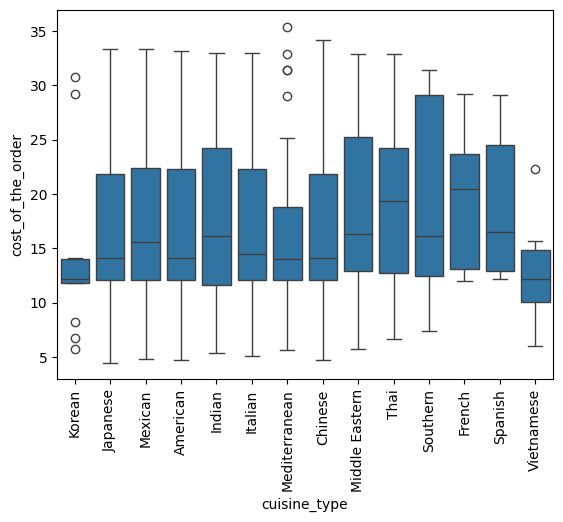

In [36]:
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show ()


Observation : very few Mediterranean dishes are very costly. On an average all the dishes ranges from 12 dollars to 23 dollars. various box plot shows that  cost of the many cuisine_type dishes looks right skewed and french is left skewed.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [53]:
# Write the code here
df_1 = data[['restaurant_name','rating']][data['rating']!= 0].groupby('restaurant_name').mean()> 4
df_1.reset_index(inplace=True)

df_2  = data[['restaurant_name','rating']][data['rating']!= 0].groupby(['restaurant_name']).count() > 50
df_2.reset_index(inplace=True)

eligible_restaurants = pd.merge(df_1[df_1['rating']== True], df_2[df_2['rating']== True],on ='restaurant_name')
eligible_restaurants


,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
Blue Ribbon Fried Chicken	, Blue Ribbon Sushi, Shake Shack, The Meatball Shop are the restaurants which are have rating > 4 and the count of their rating is > 50. These are eligible for offers.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [61]:
# Write the code here

def add_cost (cost):
  income = 0
  if cost > 20:
    income = cost*0.25
  elif cost > 5:
    income = cost*0.15
  return income
data['income'] = data['cost_of_the_order'].apply(add_cost)
data['income'].sum()



6166.303

#### Observations: Net revenue generated by the company is 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [76]:
# Write the code here
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,day_of_the_week_new,new_cost,income,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20,1,38.4375,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23,1,13.8920,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0,14.0645,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1,36.5000,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0,13.3285,1.7385,49


In [77]:
#calculate the percentage of orders that took more than 60 minutes
total_orders = data['total_time'].count()
total_order_took_more_time = data[data['total_time']>60]['total_time'].count()
percentage =  total_order_took_more_time * 100 / total_orders
percentage


10.53740779768177



```
# This is formatted as code
```

#### Observations: The total percentage of orders that took more than 60 minutes is 10.54.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [10]:
# Write the code here

agg_data = data.groupby(data['day_of_the_week'])['delivery_time'].agg(['mean', 'count'])
agg_data


,mean,count
day_of_the_week,,
Weekday,28.340037,547
Weekend,22.470022,1351


#### Observations:
Mean delivery time on weekdays is more i.e.28.23 minutes whereas the Mean delivery time on weekends is 22.47 minutes eventhough no. of orders on weekends are more than weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [12]:
data[data['rating'] == 0].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
day_of_the_week_new      736
dtype: int64

In [28]:
df1 = data[['cuisine_type', 'rating']][data['rating']==0].groupby('cuisine_type').count()
df1 = df1.sort_values(by=['rating'], ascending=False)
df1.head()


,rating
cuisine_type,
American,216
Japanese,197
Italian,126
Chinese,82
Mexican,29


In [27]:
df2 = data[['cuisine_type', 'rating']][data['rating']!=0].groupby('cuisine_type').count()
df1 = df2.sort_values(by=['rating'], ascending=False)
df2.head()


,rating
cuisine_type,
American,368
Chinese,133
French,10
Indian,50
Italian,172


### Conclusions:
*  We see that there is large data , which has not rated. Weekend / weekdays the popularity of same cuisine type is maintained.

### Recommendations:
*There is big difference in getting orders on weekend(1351) and weekdays(547)
more offers / discount can be given during weekdays to increase the orders.
*It should be checked how to encourage rating to get better understanding of restaurant and cuisine type.

  

---